# Session 4: NumPy, Pandas, seaborn & SciPy

Last week, you learned about functions and external modules in python - this week, we'll introduce you to some of the most powerful external modules for data analysis in python, and we'll show you how you can start using them to write an entire analysis pipeline for your data set. 

We'll use the Titanic data set throughout this week's session, which you can learn more about here: https://www.kaggle.com/c/titanic/

## 4.0 NumPy

Numpy is short for "Numerical Python", and that's basically what it is: a Python module to help you efficiently handle numerical data in Python. It contains, among many other things, functionalities that allow you to work with matrices and N-dimensional arrays, as well as built-in functions for linear algebra and random number capabilities.  
The documentation is located at https://docs.scipy.org/doc/numpy-1.13.0/reference/.

By convention, numpy is imported as _np_:

In [1]:
import numpy as np

### 4.0.0 NumPy arrays

NumPy arrays offer a very efficient way of storing data in an array structure, and they also provide useful operations for these arrays. We'll provide a very brief introduction to NumPy arrays and the things they allow you to do here, but feel free to read more in the documentation! :)

There are several straight-forward ways of creating a NumPy array:

In [2]:
# Create an array of a list
int_array = np.array([1,2,3,4,5])
print(int_array)

# Create a 1*10 float array filled with zeros
zero_array = np.zeros(10, dtype=float)
print(zero_array)

# Create a 3x5 integer array filled with ones
ones_array = np.ones((3, 5), dtype=int)
print(ones_array)

# Create a 5x5 array filled with random numbers between 0 and 1
random_array = np.random.random((3,5))
print(random_array)

[1 2 3 4 5]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[ 0.04659893  0.79771438  0.12101304  0.90107948  0.08425293]
 [ 0.98345539  0.83057716  0.72529523  0.97650952  0.8001808 ]
 [ 0.6211651   0.71087093  0.32477816  0.28810351  0.36439798]]


This looks suspiciously similar to a "normal" python list, but NumPy arrays are actually a lot more memory-efficient and better at handling multidimensional data. 

### 4.0.1 Array attributes

Each NumPy arrays comes with three attributes: _ndim_, _shape_, and _size_.

In [3]:
print("number of dimensions: ", ones_array.ndim)       # the number of dimensions in the array
print("size of each dimension: ", ones_array.shape)    # the size of each dimension in the array
print("size of the entire array: ", ones_array.size)   # the size of the entire array

number of dimensions:  2
size of each dimension:  (3, 5)
size of the entire array:  15


### 4.0.2 Indexing arrays

One-dimensional arrays can be indexed very similarly to "normal" lists:

In [ ]:
zero_array[2:-4]

In a multi-dimensional array, you access a specific value by using comma-separated indeces:

In [ ]:
random_array[0,2] # this returns row 0, column 1

You can also edit entries using the same notation:

In [ ]:
random_array[0,2] = 0.18
print(random_array)

In order to access a specific subset of a NumPy array, you can use slicing:

In [ ]:
print(random_array[:2, :3]) # subset the first two rows and the first three columns of the original array
print(random_array[0, :])   # subset the entire first row of the original array
print(random_array[:, 1])   # subset the entire first column of the original array

### 4.0.3 Combining arrays

NumPy allows you to combine arrays in different dimensions:

In [ ]:
array1 = np.array([1,2,3])
array2 = np.array([4,5,6])

array3 = np.vstack([array1, array2]) # stack "vertically"
array4 = np.hstack([array1, array2]) # stack "horizontally"

print(array3)
print(array4)

### 4.0.4 Operating on arrays

As we mentioned earlier, NumPy comes with several useful functions, some of which operate a lot faster than "normal" python built-ins. For example, let's compare how fast NumPy's sum function is compared to the original built-in:

In [ ]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

It's almost twice as fast! The same goes for min, max, and other functions:

In [ ]:
%timeit min(big_array)
%timeit np.min(big_array)

There's a lot more to NumPy, but most of it you'll find out as you go along and use it. And there's a very useful, in-depth chapter about NumPy in the "Python Data Science Handbook" here: https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html We highly recommend going through this in your own time if you want to learn about NumPy in more depth. 

For the purpose of this very brief introduction, let's just acknowledge that NumPy offers a lot of useful ways of dealing with multi-dimensional arrays and numerical data. Speaking of data... let's actually import a data set! We'll use Pandas for that.

## 4.1 Pandas

Pandas is a python library built "on top" of NumPy, extending NumPy's functionality quite a bit.  
Docs are at https://pandas.pydata.org/pandas-docs/stable/. These docs are markedly worse than for most Python modules, but luckily pandas is usually pretty easy to use.

By convention, pandas is imported as pd:

In [5]:
import pandas as pd

The main objects you'll be dealing with in pandas are Series and DataFrames. These are similar to NumPy arrays, but they include labeled rows and columns, and they allow heterogenous data types and missing values. Here is a quick example of how to initialize a Series and a DataFrame:

In [6]:
test_series = pd.Series([1,2,3,'four',[5,6,7]])
print(test_series)
test_df = pd.DataFrame(random_array)
print(test_df)

0            1
1            2
2            3
3         four
4    [5, 6, 7]
dtype: object
          0         1         2         3         4
0  0.046599  0.797714  0.121013  0.901079  0.084253
1  0.983455  0.830577  0.725295  0.976510  0.800181
2  0.621165  0.710871  0.324778  0.288104  0.364398


...but usually, we'd prefer not to manually enter our data into our data frame, so let's import an actual data set.

### 4.1.0 Reading a data set into python using pandas

The data set we'll be using is the Titanic data set. It contains data about the passengers of the Titanic, and it's one of the most widely used open data sets for learning data science and machine learning (see https://www.kaggle.com/c/titanic for a more in-depth description, plus some fun examples of how others have analysed this data set before). For the purpose of today's session, we will simply explore this data set a little and find out how NumPy, pandas, seaborn and SciPy allow us to handle the data

Here's how you read a data set into pandas:

In [7]:
# use the pd.read_csv function to read in a comma-separated file
titanic = pd.read_csv('titanic.csv')

In [8]:
# preview the data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The .head() method allows us to get a peak of our data without having to print all of it to the screen. Pretty useful! 

From this preview, we can see the types of information that are included in the data set. For example, there are columns with information about whether or not the passenger survived (0 or 1), the class they travelled in (1,2,3), their name, gender, and age, and how much they paid for their ticket. We also get information about how many siblings or spouses were with them (SibSp), and how many parents and children (Parch). "Embarked" is an abbreviation for the harbour at which the passenger embarked.

For further steps of the analysis, it would be useful to know the data types of the values in each column. pandas allows you to display a summary of this information:

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


This tells us the type of each of the columns. PassengerId, for example, appears to be an integer. This also tells us that there are 891 entries in our data frame. Most columns seem to be "complete" (i.e., they have 891 values), but others, such as Age and Cabin, seem to have missing values. 

There's another, more explicit way of looking for missing values in pandas DataFrames:

In [10]:
titanic.isnull().sum() # the sum() method summarizes all the missing values for each column
# you can leave it out if you would like an explicit overview of all the values in the data frame

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Again, this tells us that there are 177 missing values in the Age column, 687 in the cabin column, and 2 in the Embarked column.

Another way of getting a more detailed summary of the numerical data is the .describe method:

In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This gives us a neat overview of some interesting bits of information in our data (although beware that this is really just a "general idea", because we know already that we have missing data in some cases). 

### 4.1.1 Accessing pandas DataFrames

What if you wanted to access only specific subsets of the titanic data frame? Here's one way of doing this:

In [12]:
titanic['Age'].head() # leave out the ".head()" method if you really want the entire column

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [13]:
titanic.Age.head() # and this is an even easier way of accessing columns

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

You can also filter the data frame based on conditions:

In [14]:
titanic[titanic['Age'] > 18].head()
# or:
titanic[titanic.Age > 18].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


You can use \& (and) and \| (or) to refine your filter even further.

It's also possible to sort your columns in different ways:

In [15]:
titanic.sort_values('Name', ascending=False).head() # sorts descending
titanic.sort_values('Name').head() # sorts ascending

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C


### 4.1.2 Data cleaning

As we saw earlier, there are a few missing values in our data set, which can be a little annoying during further steps. Some of the columns containing missing values might not actually be all that important for our analyses, so we can drop them all together:

In [16]:
titanic = titanic.drop(['Cabin'], axis = 1) # the axis argument tells pandas that we want to drop the COLUMNS. 
# the default is axis = 0, which would drop the ROWS.

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Another possibility would be to fill in the missing values - this might not always be a good idea, but let's just assume for now that you have a good reason to do this. For example, you could fill all the missing values in a given column with the mean of that column:

In [17]:
# fill each missing value in the Age column with the mean of the Age column
titanic.Age = titanic.Age.fillna(titanic.Age.mean())
titanic.head()
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

The .isnull method tells us that we now don't have any further missing values, except for two values in the 'Embarked' column. Let's just drop the rows containing these missing values:

In [19]:
titanic = titanic.dropna()
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Looks like we got rid of all the missing values! Now imagine you wanted to change the values of the 'Survived' column to 'yes' and 'no', rather than 1 and 0:

In [18]:
titanic.Survived = titanic.Survived.replace([1,0], ['yes','no'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,no,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,no,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


You can also easily rename the columns, like this:

In [20]:
titanic = titanic.rename(columns={'Parch': 'ParCh'})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Embarked
0,1,no,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,no,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


It's also possible to join several data frames together. For example, imagine you had a different data frame with all the passenger IDs, plus whether they were left- or right-handed:

In [21]:
# making a random data frame
handedness = pd.DataFrame(index = range(0,891), columns = ['Handedness', 'PassengerId'])
handedness.Handedness = np.random.choice([1,0], len(handedness))
handedness.PassengerId = np.arange(1,892)
handedness.info()
handedness.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
Handedness     891 non-null int64
PassengerId    891 non-null int64
dtypes: int64(2)
memory usage: 14.0 KB


,Handedness,PassengerId
count,891.000000,891.000000
mean,0.507295,446.000000
std,0.500228,257.353842
min,0.000000,1.000000
25%,0.000000,223.500000
50%,1.000000,446.000000
75%,1.000000,668.500000
max,1.000000,891.000000


In [22]:
 pd.concat([titanic, handedness], axis=1).head() # axis = 1 tells pandas that we want to concatenate columns, not rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Embarked,Handedness,PassengerId
0,1.0,no,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,1,1
1,2.0,yes,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C,1,2
2,3.0,yes,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,1,3
3,4.0,yes,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S,1,4
4,5.0,no,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S,1,5


Now that we've done all that work on the Titanic dataset, we'll want to preserve it by writing it to a file. Pandas has a convenient way to do this for dataframes:

In [23]:
titanic.to_csv('titanic_cleaned.csv')

## 4.2 Seaborn
Seaborn is a plotting library, similar to ggplot in R. Basic plotting with Seaborn is very easy, but as with ggplot, it has many options for altering and extending figures and it's easy to get lost in the details. Today we will only cover some of the basics, but Seaborn has excellent documentation, so if you want to know more, go to https://seaborn.pydata.org/.  
To get started, let's just import seaborn and draw a line.

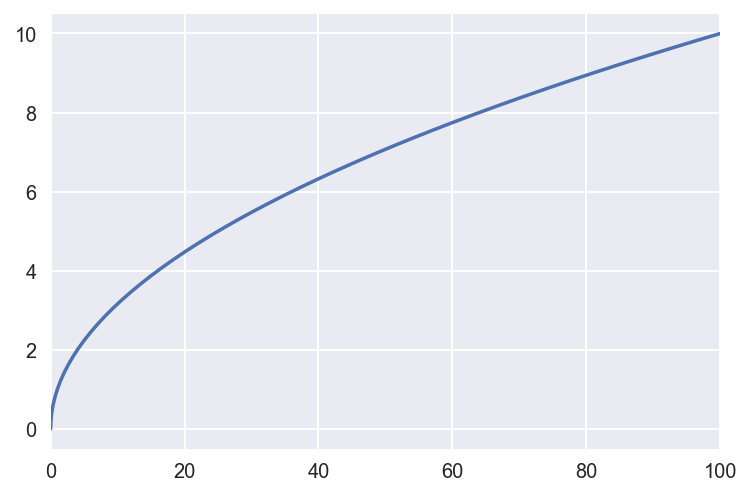

In [26]:
import seaborn as sns  # convention is to import seaborn under the name sns, for unclear reasons

# some magic that will make this notebook display our plots inline, don't worry about this for now
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# make up some x and y values
x = np.linspace(0, 10)
y = x * x

# and plot using the lineplot method
sns.tsplot(x, y)

That was rather easy, but let's plot something more interesting.  
Using the Titanic data, we can plot the relationship between different variables and survival rate. Let's start with age. The obvious way to plot this is using a violinplot or something similar.

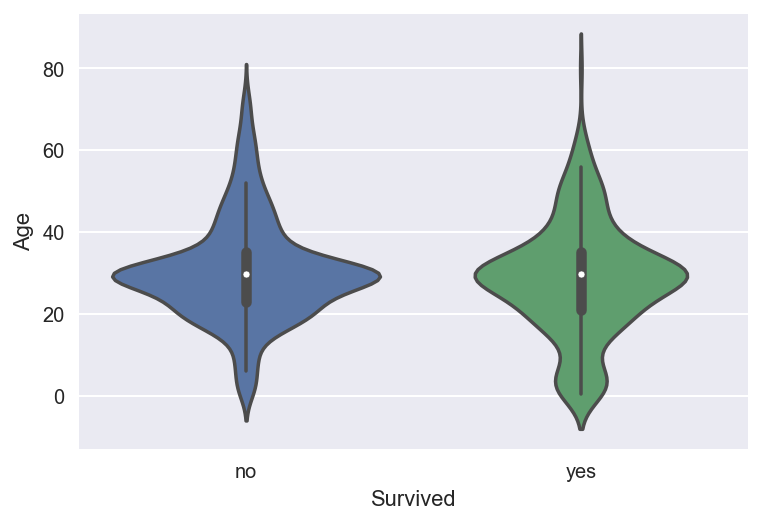

In [27]:
# seaborn has a violinplot method, so this will be fairly easy
sns.violinplot(x='Survived', y='Age', data=titanic)

That looks fairly similar between the yes and no groups, except for a little bump just above age 0 in the survived group. It seems like they may have made an effort to put children on the lifeboats first.  
That makes me wonder if women were sent to the lifeboats before men. Let's plot that and see.

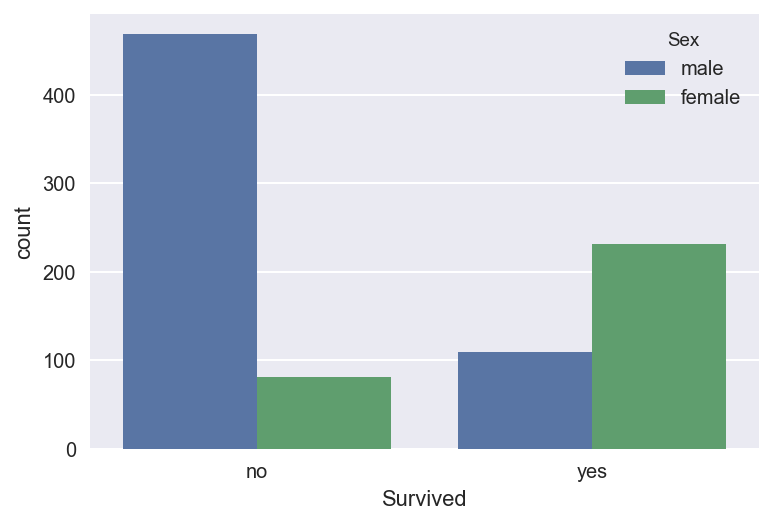

In [28]:
sns.countplot(x='Survived', hue='Sex', data=titanic)

Wow, that seems like quite a difference.  
There were three classes of ticket sold on the Titanic. Using the `countplot()` method, plot the survival numbers for each class.

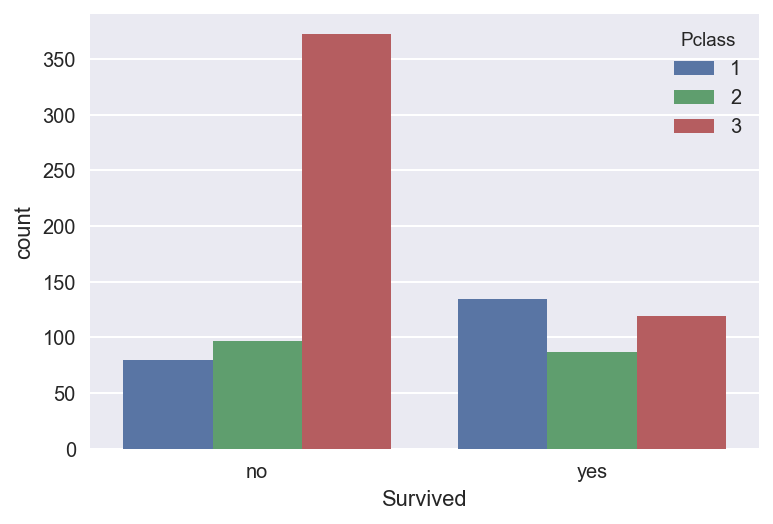

In [32]:
# plot surivival counts for each class here.
sns.countplot(x='Survived', hue = 'Pclass', data=titanic)

While survival is the most salient part of this dataset, there are of course other things we can plot that might be of interest. For instance, what is the relationship between price of the ticket (_fare_) and age?  
Plot this using a scatterplot. (Hint: It's the `scatterplot()` method!)

In [35]:
# plot age by ticket price here
sns.scatterplot(x='Age',y='Fare',data=titanic)

AttributeError: module 'seaborn' has no attribute 'scatterplot'

That's not very easy to interpret by sight. Let's add a trendline using linear regression.  
The plotting method for this is called `regplot()`.

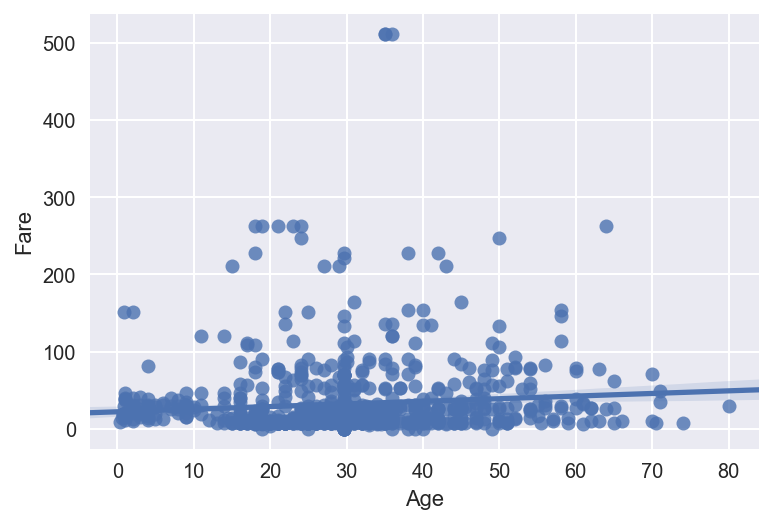

In [36]:
# plot using regplot here
sns.regplot(x='Age',y='Fare',data=titanic)

## 4.3 SciPy
Because we have limited time to go over everything, we're not going to do anything about SciPy other than to say: SciPy is essentially an extension of NumPy. If you can't find some kind of numerical operation you need in NumPy, SciPy might have it. (If you're going to do weird statistics or EEG/MEG/fMRI analysis, you might need SciPy's signal processing or linear algebra functions at some point.)  
Documentation is pretty good and is located at https://docs.scipy.org/doc/scipy/reference/.

## 4.4 DIY time!
Feel free to mess around with the Titanic dataset some more, exploring it in different ways by grouping and plotting data. When you feel like you want another challenge, move on to this week's additional exercises.